In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms.functional import to_tensor

In [2]:
train_set = MNIST('datasets', train=True, download=True, transform=to_tensor)
len(train_set)

60000

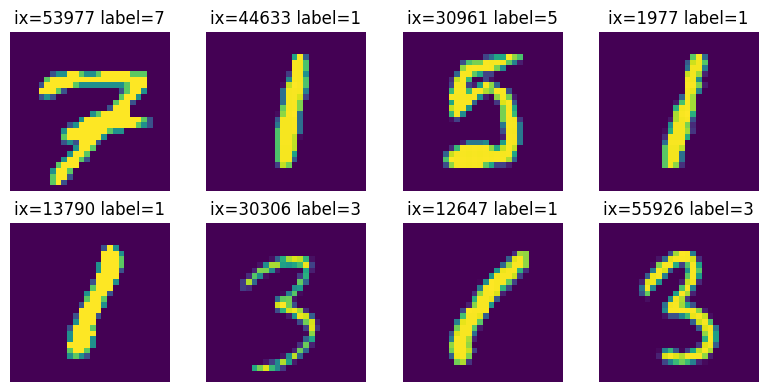

In [3]:
# See images in dataset
plt.figure(figsize=(8,4))
ixs = torch.randint(low=0, high=len(train_set), size=(8,)).tolist()
for i, ix in enumerate(ixs):
    img, label = train_set[ix]
    plt.subplot(2, 4, i+1)
    plt.imshow(torch.squeeze(img))
    plt.title(f'{ix=} {label=}')
    plt.axis('off')
plt.tight_layout()

In [4]:
encoder = nn.Sequential(
    nn.Linear(in_features=28*28, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=2),
)

decoder = nn.Sequential(
    nn.Linear(in_features=2, out_features=128),
    nn.Tanh(),
    nn.Linear(in_features=128, out_features=28*28),
    nn.Sigmoid(),
)

net = nn.Sequential(encoder, decoder)
net

Sequential(
  (0): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (1): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

In [5]:
# Train the network
epochs = 20
train_loader = DataLoader(train_set, batch_size=64)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

net.train()
for epoch in range(1, epochs+1):
    running_loss = 0
    for i, (images, _) in enumerate(train_loader):
        optimizer.zero_grad()

        inputs = torch.flatten(images, start_dim=1)
        outputs = net(inputs)
        loss = nn.functional.mse_loss(outputs, target=inputs)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch {epoch} completed! Avg loss: {running_loss/len(train_loader)}')

Epoch 1 completed! Avg loss: 0.05891236162055403
Epoch 2 completed! Avg loss: 0.05070508092737147
Epoch 3 completed! Avg loss: 0.04831703332489106
Epoch 4 completed! Avg loss: 0.04663106825337735
Epoch 5 completed! Avg loss: 0.04532603595032494
Epoch 6 completed! Avg loss: 0.04433606437909832
Epoch 7 completed! Avg loss: 0.043575951388713396
Epoch 8 completed! Avg loss: 0.04297671511546889
Epoch 9 completed! Avg loss: 0.04248897715418069
Epoch 10 completed! Avg loss: 0.04208918280804208
Epoch 11 completed! Avg loss: 0.04175405591519784
Epoch 12 completed! Avg loss: 0.041455219283318724
Epoch 13 completed! Avg loss: 0.04118846577288372
Epoch 14 completed! Avg loss: 0.04094862644431561
Epoch 15 completed! Avg loss: 0.04073399874463137
Epoch 16 completed! Avg loss: 0.04053862965596256
Epoch 17 completed! Avg loss: 0.040361239477547245
Epoch 18 completed! Avg loss: 0.04020001817502574
Epoch 19 completed! Avg loss: 0.040052162431704716
Epoch 20 completed! Avg loss: 0.039914101058406745


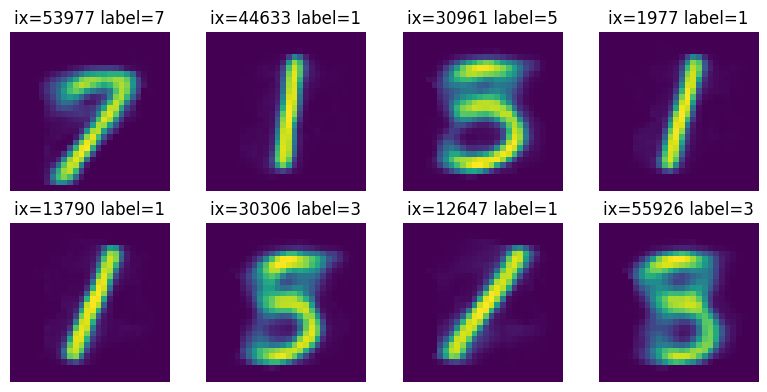

In [6]:
# See images from encoder
plt.figure(figsize=(8,4))
for i, ix in enumerate(ixs):
    img, label = train_set[ix]
    with torch.no_grad():
        output = net(torch.flatten(img, start_dim=1))
    img = torch.reshape(output, (28, 28))

    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title(f'{ix=} {label=}')
    plt.axis('off')
plt.tight_layout()

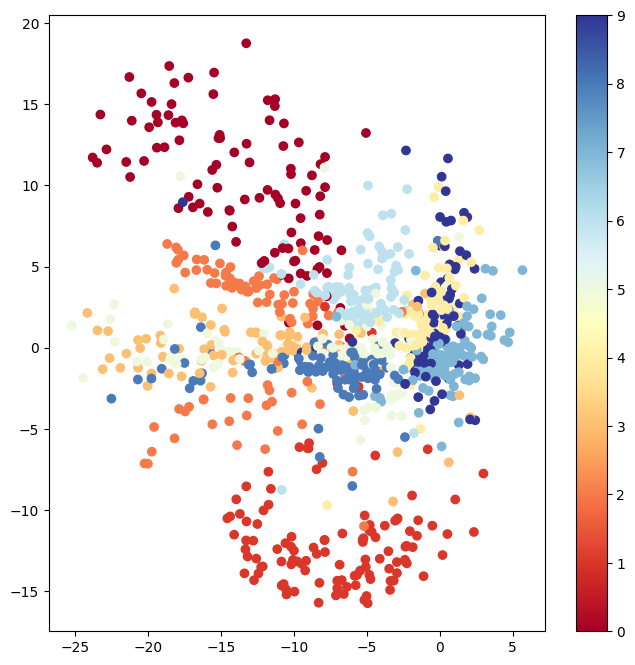

In [8]:
from matplotlib import colormaps

tsne_indexes = torch.randint(low=0, high=len(train_set), size=(1000,))

latent_vecs, labels = [], []
for ix in tsne_indexes:
    x, label = train_set[ix]
    with torch.no_grad():
        x = torch.flatten(x, start_dim=1)
        z = encoder(x)
    latent_vecs.append(z)
    labels.append(label)
latent_vecs = torch.cat(latent_vecs)


cm = colormaps['RdYlBu']
plt.figure(figsize=(8,8))
sc = plt.scatter(latent_vecs[:, 0], latent_vecs[:, 1], c=labels, cmap=cm)
plt.colorbar(sc)
plt.show()